In [1]:
from openpyxl import load_workbook
import pandas as pd
from pandas import datetime
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 30})

<ipython-input-1-8245202b7013>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
wb = load_workbook('vaccinations_data_24.04.xlsx')

In [3]:
print(wb.sheetnames)

['основное', 'АИТ аутоиммунные', 'диабет', 'астма аллергия', 'инфаркт инсульт', 'онкология', 'тромбоз тромбофилия тромбофлеби', 'контроли АТ', 'Moderna_Pfizer', 'возраст']


In [4]:
data = pd.DataFrame(wb['основное'].values)
# data = pd.DataFrame(wb['общая'].values)
row_after_last_person_i = 4238

In [5]:
# remove the header row
# remove rows that are empty except for index
data = data.iloc[1:row_after_last_person_i]

In [6]:
data.shape

(4237, 99)

In [7]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data[data[1].isna()])

In [8]:
data = data[data[1].notna()]  # remove rows w/o indices in column 1

In [9]:
data.shape

(4216, 99)

In [10]:
data = data[[0,] + list(range(2, 27))]

In [11]:
data = data.rename(columns={0: 'prev_covid', 2: 'name', 3: 'gender', 4: 'age', 5: 'illnesses', 6: 'blood_type',
                     7: 'v1_date', 8: 'v1_fever', 9: 'v1_chills', 10: 'v1_headache', 11: 'v1_arm_pain', 12: 'v1_lymph_nodes',
                     13: 'v1_muscle_pain', 14: 'v1_drowsiness_weakness', 15: 'v1_other',
                     16: 'v1_antibodies', 17: 'v2_antibodies',
                     18: 'v2_date', 19: 'v2_fever', 20: 'v2_chills', 21: 'v2_headache', 22: 'v2_arm_pain', 23: 'v2_lymph_nodes',
                     24: 'v2_muscle_pain', 25: 'v2_drowsiness_weakness', 26: 'v2_other'})

In [12]:
data.gender.unique()

array(['ж', 'м', 'v', None, ';', 'Ж ', 'м ', 'пол', 'ж ', ' ж', ' ж ',
       'х'], dtype=object)

In [13]:
# data = data.drop(data[data.age == 4].index)
data = data.drop(data[data.gender == 'пол'].index)  # remove rows with headers

In [14]:
data = data.reset_index(drop=True)

In [15]:
# for i, row in data.iterrows():
# #     print(i, row[['name', 'gender', 'age']])
#     if row['name'] is not None:
#         print(row['name'])
#     else:
#         print(row['age'])

In [16]:
# data

In [17]:
# data.to_csv('vaccination_data_processed_06.02.21.csv')
# data.to_csv('vaccination_data_processed_21.01.21.csv')
data.to_csv('vaccination_data_processed_24.04.21.csv')

In [18]:
# doesn't currently work because of nans
# data = pd.read_csv('vaccination_data_processed_06.02.21.csv', index_col=0)

In [19]:
# data = data.where(data.notnull(), None)

In [20]:
# forget about it, just process the original dataframe with different data types instead of just strings

In [21]:
data.columns

Index(['prev_covid', 'name', 'gender', 'age', 'illnesses', 'blood_type',
       'v1_date', 'v1_fever', 'v1_chills', 'v1_headache', 'v1_arm_pain',
       'v1_lymph_nodes', 'v1_muscle_pain', 'v1_drowsiness_weakness',
       'v1_other', 'v1_antibodies', 'v2_antibodies', 'v2_date', 'v2_fever',
       'v2_chills', 'v2_headache', 'v2_arm_pain', 'v2_lymph_nodes',
       'v2_muscle_pain', 'v2_drowsiness_weakness', 'v2_other'],
      dtype='object')

In [22]:
data['gender'].unique()

array(['ж', 'м', 'v', None, ';', 'Ж ', 'м ', 'ж ', ' ж', ' ж ', 'х'],
      dtype=object)

In [23]:
data.loc[data['gender']=='v', 'gender'] = None
data.loc[data['gender']==';', 'gender'] = None
data.loc[data['gender']=='х', 'gender'] = None

data.loc[data['gender']=='ж', 'gender'] = 'f'
data.loc[data['gender']=='ж ', 'gender'] = 'f'
data.loc[data['gender']=='Ж ', 'gender'] = 'f'
data.loc[data['gender']==' ж', 'gender'] = 'f'
data.loc[data['gender']==' ж ', 'gender'] = 'f'

data.loc[data['gender']=='м', 'gender'] = 'm'
data.loc[data['gender']=='м ', 'gender'] = 'm'
data.loc[data['gender']=='М ', 'gender'] = 'm'

In [24]:
# data['gender'] = data['gender'].replace(to_replace=('v', ';'), value=None)
# data['gender'] = data['gender'].replace(to_replace={';': None})
# data['gender'] = data['gender'].replace(to_replace={'v': None})
# data['gender'] = data['gender'].replace(to_replace=('ж', 'ж ', 'Ж '), value='f')
# data['gender'] = data['gender'].replace(to_replace=('м', 'м ', 'М '), value='m')

In [25]:
data['gender'].unique()

array(['f', 'm', None], dtype=object)

In [26]:
data['age'].unique()

array([None, 37.0, 50.0, 43.0, 36.0, 47.0, 29.0, 46.0, 34.0, 32.0, 38.0,
       39.0, 30.0, 42.0, 35.0, 57.0, 22.0, 25.0, 33.0, 55.0, 49.0, 31.0,
       28.0, 23.0, 27.0, 26.0, 48.0, 24.0, 53.0,
       datetime.datetime(1900, 2, 9, 0, 0), 21.0, 56.0, 60.0, 54.0, 44.0,
       '30лет', 52.0, 45.0, 51.0, 20.0, 40.0, 41.0, 19.0, ' ', 59.0, 81.0,
       58.0, 64.0, 65.0, 63.0, 69.0, 75.0, 67.0, 73.0, 71.0, 83.0, 87.0,
       61.0, 70.0, 79.0, 72.0, 68.0, 62.0, 74.0, 18.0, 80.0, 66.0, 78.0,
       85.0, 76.0, 77.0, 82.0, 86.0, 84.0, 90.0, '?', 92.0,
       datetime.datetime(1900, 1, 30, 0, 0), 89.0, 88.0], dtype=object)

In [27]:
# data.loc[data['age'] == '39лет', 'age'] = 39
# data.loc[data['age'] == '1900-01-30 00:00:00', 'age'] = None
data.loc[data['age'] == '30лет', 'age'] = 30
data.loc[data['age'] == datetime(1900, 1, 30, 0, 0), 'age'] = None
data.loc[data['age'] == datetime(1900, 2, 9, 0, 0), 'age'] = None
data.loc[data['age'] == '?', 'age'] = None
data.loc[data['age'] == ' ', 'age'] = None

In [28]:
data['age'].unique()

array([None, 37.0, 50.0, 43.0, 36.0, 47.0, 29.0, 46.0, 34.0, 32.0, 38.0,
       39.0, 30.0, 42.0, 35.0, 57.0, 22.0, 25.0, 33.0, 55.0, 49.0, 31.0,
       28.0, 23.0, 27.0, 26.0, 48.0, 24.0, 53.0, 21.0, 56.0, 60.0, 54.0,
       44.0, 52.0, 45.0, 51.0, 20.0, 40.0, 41.0, 19.0, 59.0, 81.0, 58.0,
       64.0, 65.0, 63.0, 69.0, 75.0, 67.0, 73.0, 71.0, 83.0, 87.0, 61.0,
       70.0, 79.0, 72.0, 68.0, 62.0, 74.0, 18.0, 80.0, 66.0, 78.0, 85.0,
       76.0, 77.0, 82.0, 86.0, 84.0, 90.0, 92.0, 89.0, 88.0], dtype=object)

In [29]:
data[data['age'] > 70].shape

(205, 26)

In [30]:
# data['age'] = data['age'].astype('float')

In [31]:
backup = data.copy()

In [32]:
# data['v1_fever'] = data['v1_fever'].replace(to_replace={'нет': None})

In [33]:
data = backup.copy()

In [34]:
data['v1_fever'].unique()

array([37.5, 38.6, 'нет', 38.0, 37.0, 38.3, 38.5, 37.9, 37.7, 37.2,
       '37.2', 37.6, '39.4', '37.4', '37.3', 37.8, '37.7', 37.1, '37.6',
       '38.5', '37.5', None, 38.2, 40.0, 39.0, '38.2', '37.8', '38.8',
       '37.1', 39.5, 38.4, '38.3', '38.1', 38.8, 37.4, 38.7, 'есть', 35.6,
       34.7, 37.3, 38.1, 36.1, 36.8, 36.9, '39, 1', 39.2, 38.9, 39.3,
       39.1, 35.7, 39.4, 39.8, 'нет ', '38+', 'более 37.4', 'лихорадка',
       '38,5,', 'около 40', 'повышенная', '38,2\xa0', 39.9, 35.5, ' нет',
       'повышена', '37.5+', ' 37.8', '37.0', '38.0', 'небольшая', '37+',
       39.6, '35.7', 36.7, '-', '35.9', '36.5', '38.9', '38.4', 35.0,
       '38.6', '39.2', '37.9', '39.3', '39.5', '36.8', '34.7', '35.3',
       '35.7- 37.8', '39.1', '38.7', 385.0, 'высокая', 27.7,
       'не измерялась, по ощущениям была повышена', 27.2, 35.1, 39.7,
       36.3, 36.0], dtype=object)

In [35]:
temp_off = ['нет', ' нет', 'нет ', 'не измерялась, по ощущениям была повышена', '-']
temp_on = ['есть', 'повышенная', 'лихорадка', 'более 37.4', '+', '38+', 'повышена', 'небольшая', 'высокая',
           '37+', '37.5+']
temp_invalid = [385.0, '35.7- 37.8']
for val in temp_off:
    data.loc[data['v1_fever'] == val, 'v1_fever'] = False
for val in temp_on:
    data.loc[data['v1_fever'] == val, 'v1_fever'] = True
for val in temp_invalid:
    data.loc[data['v1_fever'] == val, 'v1_fever'] = None

In [36]:
data.loc[data['v1_fever'] == '39, 1', 'v1_fever'] = 39.1
data.loc[data['v1_fever'] == ' 37.8', 'v1_fever'] = 37.8
data.loc[data['v1_fever'] == 'около 40', 'v1_fever'] = 40
data.loc[data['v1_fever'] == '38,5,', 'v1_fever'] = 38.5
data.loc[data['v1_fever'] == '38,2\xa0', 'v1_fever'] = 38.2

data.loc[data['v1_fever'] == 27.7, 'v1_fever'] = 37.7
data.loc[data['v1_fever'] == 27.2, 'v1_fever'] = 37.2

for i in range(80):
    val = 34.5 + i / 10
    data.loc[data['v1_fever'] == f'{val:.1f}', 'v1_fever'] = val

In [37]:
data['v1_fever'].unique()

array([37.5, 38.6, False, 38.0, 37.0, 38.3, 38.5, 37.9, 37.7, 37.2, 37.6,
       39.4, 37.4, 37.3, 37.8, 37.1, None, 38.2, 40.0, 39.0, 38.8, 39.5,
       38.4, 38.1, 38.7, True, 35.6, 34.7, 36.1, 36.8, 36.9, 39.1, 39.2,
       38.9, 39.3, 35.7, 39.8, 39.9, 35.5, 39.6, 36.7, 35.9, 36.5, 35.0,
       35.3, 35.1, 39.7, 36.3, 36.0], dtype=object)

In [38]:
data['v2_fever'].unique()

array([None, 'нет', '37.4', 'v', 37.1, '38.4', 38.3, 37.2, 37.0, 38.0,
       37.4, 38.5, 38.1, 38.6, '38.5', 38.2, 37.7, 40.0, 37.8, 37.9, 39.1,
       39.2, 38.4, '37.1', 37.5, '38+', 37.3, 39.0, '37.7', 37.6, 38.9,
       ' ', 38.8, '37,6 х', 'есть', '37.3', 28.0, '40-41', 38.7, 34.8,
       35.6, '+', 39.5, 39.3, 'повышение', '37.9', '38.0', 39.7, 40.2,
       'небольшая', '38,6+', 'высокая', 'повышена', 39.6, '37.2', 0.2,
       'х', 35.7, 'да', datetime.datetime(2021, 1, 27, 0, 0), 36.8, 39.4,
       '37, затем 34,4'], dtype=object)

In [39]:
temp_off = ['нет', ' нет', 'нет ', 'не измерялась, по ощущениям была повышена', '-']
temp_on = ['есть', 'повышенная', 'повышена', '+', '38,6+', '37, затем 34,4', 'повышена', 'небольшая', 'высокая',
           '37+', '37.5+', '40-41', '37,6 х', 'да', '38+', 'повышение']
temp_invalid = [' ', 'v', 0.2, 'х', datetime(2021, 1, 27, 0, 0), 28.0]
for val in temp_off:
    data.loc[data['v2_fever'] == val, 'v2_fever'] = False
for val in temp_on:
    data.loc[data['v2_fever'] == val, 'v2_fever'] = True
for val in temp_invalid:
    data.loc[data['v2_fever'] == val, 'v2_fever'] = None

# data.loc[data['v2_fever'] == 'нет', 'v2_fever'] = False
# data.loc[data['v2_fever'] == datetime(2021, 12, 28, 0, 0), 'v2_fever'] = None
# data.loc[data['v2_fever'] == datetime(2021, 1, 27, 0, 0), 'v2_fever'] = None

for i in range(80):
    val = 34.5 + i / 10
    data.loc[data['v2_fever'] == f'{val:.1f}', 'v2_fever'] = val

In [40]:
data['v2_fever'].unique()

array([None, False, 37.4, 37.1, 38.4, 38.3, 37.2, 37.0, 38.0, 38.5, 38.1,
       38.6, 38.2, 37.7, 40.0, 37.8, 37.9, 39.1, 39.2, 37.5, True, 37.3,
       39.0, 37.6, 38.9, 38.8, 38.7, 34.8, 35.6, 39.5, 39.3, 39.7, 40.2,
       39.6, 35.7, 36.8, 39.4], dtype=object)

In [41]:
# data.v1_date.unique()

In [42]:
date_invalid = ['??', 'КИ04.дек', 'даты нет', '?(вероятно, 16.дек-писал сообщение с вопросом может ли быть плацебо в ГВ)', 44218.0, 44220.0,
 'дек','янв','не указано', 'фев', 'дек.', 'нет', 'февраль', '?',]
for val in date_invalid:
    data.loc[data['v1_date'] == val, 'v1_date'] = None

In [43]:
data.loc[data['v1_date'] == '2 фев', 'v1_date'] = datetime(2021, 2, 2)
data.loc[data['v1_date'] == '3 фев', 'v1_date'] = datetime(2021, 2, 3)
data.loc[data['v1_date'] == '4 фев', 'v1_date'] = datetime(2021, 2, 4)

In [44]:
# replace auto-assigned years with correct years
for cur_datetime in data.v1_date.unique():
    if isinstance(cur_datetime, datetime):
        new_datetime = None
        if cur_datetime.month >= 9:
            new_datetime = datetime(2020, cur_datetime.month, cur_datetime.day)
        elif cur_datetime.month <= 4:  # Watch out for future updates of the dataframe!
            new_datetime = datetime(2021, cur_datetime.month, cur_datetime.day)
        if new_datetime is not None:
            data.loc[data['v1_date'] == cur_datetime, 'v1_date'] = new_datetime
    else:
        print(f'Skipping {cur_datetime}')

Skipping None


In [45]:
# data.v1_date.unique()

In [46]:
date_invalid = ['отвод из-за сильной реакции на v1', 'отмена', 'янв']
for val in date_invalid:
    data.loc[data['v2_date'] == val, 'v2_date'] = None

In [47]:
data.loc[data['v2_date'] == 30.12, 'v2_date'] = datetime(2020, 12, 30)
data.loc[data['v2_date'] == 'КИ24.12.2021', 'v2_date'] = datetime(2020, 12, 24)
data.loc[data['v2_date'] == '09 ноября ', 'v2_date'] = datetime(2020, 11, 9)
data.loc[data['v2_date'] == 13.01, 'v2_date'] = datetime(2021, 1, 13)
data.loc[data['v2_date'] == '2 фев', 'v2_date'] = datetime(2021, 2, 2)
data.loc[data['v2_date'] == '1 фев', 'v2_date'] = datetime(2021, 2, 1)
data.loc[data['v2_date'] == '11 фев', 'v2_date'] = datetime(2021, 2, 11)
data.loc[data['v2_date'] == '13 фев', 'v2_date'] = datetime(2021, 2, 13)
data.loc[data['v2_date'] == '14 фев', 'v2_date'] = datetime(2021, 2, 14)
data.loc[data['v2_date'] == '12 фев', 'v2_date'] = datetime(2021, 2, 12)
data.loc[data['v2_date'] == '16 фев', 'v2_date'] = datetime(2021, 2, 16)
data.loc[data['v2_date'] == '6 фев', 'v2_date'] = datetime(2021, 2, 6)
data.loc[data['v2_date'] == '7 фев', 'v2_date'] = datetime(2021, 2, 7)
data.loc[data['v2_date'] == '10 фев', 'v2_date'] = datetime(2021, 2, 10)
data.loc[data['v2_date'] == '9 фев', 'v2_date'] = datetime(2021, 2, 9)
data.loc[data['v2_date'] == '15 фев', 'v2_date'] = datetime(2021, 2, 15)
data.loc[data['v2_date'] == '5 фев', 'v2_date'] = datetime(2021, 2, 5)
data.loc[data['v2_date'] == '27 фев', 'v2_date'] = datetime(2021, 2, 27)
data.loc[data['v2_date'] == '17 фев', 'v2_date'] = datetime(2021, 2, 17)
data.loc[data['v2_date'] == '18 фев', 'v2_date'] = datetime(2021, 2, 18)
data.loc[data['v2_date'] == '26 фев', 'v2_date'] = datetime(2021, 2, 26)
data.loc[data['v2_date'] == '18 фев ', 'v2_date'] = datetime(2021, 2, 18)
data.loc[data['v2_date'] == '19 фев', 'v2_date'] = datetime(2021, 2, 19)
data.loc[data['v2_date'] == '24 фев', 'v2_date'] = datetime(2021, 2, 24)
data.loc[data['v2_date'] == '21 фев', 'v2_date'] = datetime(2021, 2, 21)

In [48]:
# replace auto-assigned years with correct years
for cur_datetime in data.v2_date.unique():
    if isinstance(cur_datetime, datetime):
        new_datetime = None
        if cur_datetime.month >= 9:
            new_datetime = datetime(2020, cur_datetime.month, cur_datetime.day)
        elif cur_datetime.month <= 4:  # Watch out for future updates of the dataframe!
            new_datetime = datetime(2021, cur_datetime.month, cur_datetime.day)
        if new_datetime is not None:
            data.loc[data['v2_date'] == cur_datetime, 'v2_date'] = new_datetime
    else:
        print(f'Skipping {cur_datetime}')

Skipping None


In [49]:
data = data.assign(пол=data['gender'].map({'f': 'ж', 'm': 'м', None: None}))

In [50]:
data = data.dropna(axis=0, how='all')

## General

Text(0.5, 0.01, 'Данные t.me/sputnik_results, код t.me/alexlyzhov')

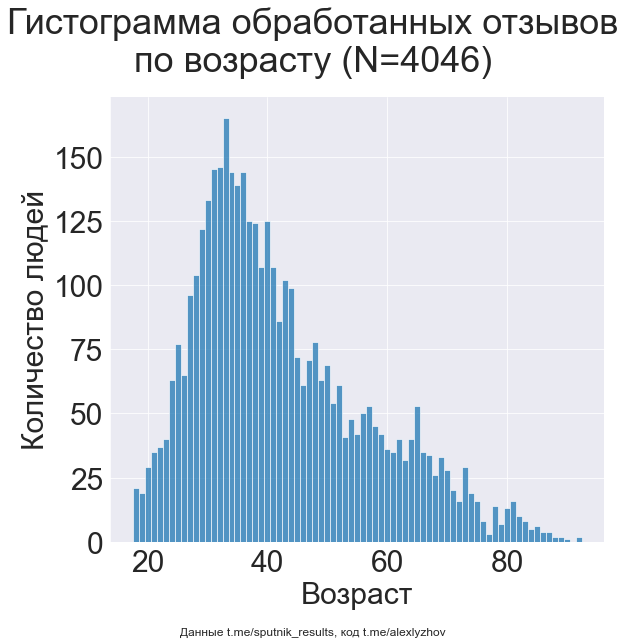

In [51]:
d = sns.displot(data['age'], height=9)
plt.ylabel('Количество людей') # rotation
plt.xlabel('Возраст')
plt.suptitle(f'Гистограмма обработанных отзывов\nпо возрасту (N={data[data["age"].notna()].shape[0]})')
# plt.subplots_adjust(top=0.92, left=0.01)
plt.subplots_adjust(top=0.84)
plt.figtext(0.5, 0.01, 'Данные t.me/sputnik_results, код t.me/alexlyzhov', horizontalalignment='center', fontsize=12)

# plt.figtext(0.5, -0.02, "Отзывы о результатах вакцинации Sputnik V (N=1416)\nt.me/sputnik_results", ha="center",
#             fontsize=18, bbox={"facecolor":"orange", "alpha": 0.25, "pad":5})
# calculate N while taking into account that there are empty rows (marked blue currently)

# plt.annotate('t.me/sputnik_results', (0,0), (-88, -74), fontsize=24, xycoords='axes fraction', textcoords='offset points', va='top')
# plt.text(0.02, 0.5, textstr, fontsize=14, transform=plt.gcf().transFigure)

In [52]:
min(data.v1_date.dropna()), max(data.v1_date.dropna())

(datetime.datetime(2020, 9, 20, 0, 0), datetime.datetime(2021, 2, 26, 0, 0))

In [53]:
min(data.v2_date.dropna()), max(data.v2_date.dropna())

(datetime.datetime(2020, 10, 11, 0, 0), datetime.datetime(2021, 3, 12, 0, 0))

Text(0.5, -0.2, 'Данные t.me/sputnik_results, код t.me/alexlyzhov')

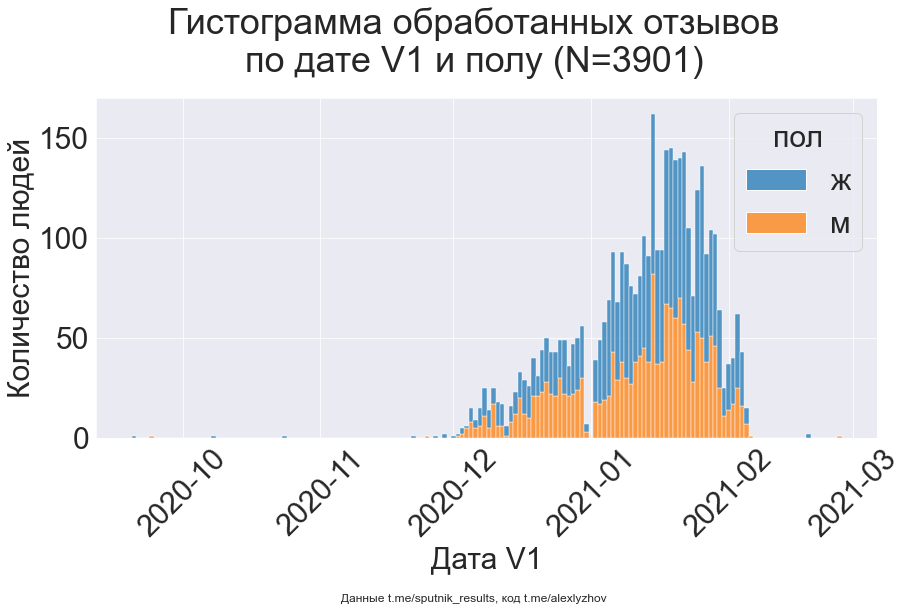

In [54]:
fig = plt.figure(figsize=(14, 7))
# sns.histplot(data, x='v1_date', hue='gender', multiple='stack')
sns.histplot(data, x='v1_date', hue='пол', multiple='stack')
fig.subplots_adjust(top=0.80)
xticks = plt.xticks(rotation=45)
plt.ylabel('Количество людей') # rotation
plt.xlabel('Дата V1')
# plt.suptitle(f'Гистограмма обработанных отзывов\nпо дате V1 и полу (N={data[(data["gender"].notna() & data["v1_date"].notna())].shape[0]})')
plt.suptitle(f'Гистограмма обработанных отзывов\nпо дате V1 и полу (N={data[(data["пол"].notna() & data["v1_date"].notna())].shape[0]})')
plt.figtext(0.5, -0.2, 'Данные t.me/sputnik_results, код t.me/alexlyzhov', horizontalalignment='center', fontsize=12)

In [55]:
data_age_int = data.dropna(subset=['age'])
data_age_int = data_age_int.assign(age=data_age_int.age.astype(int))

Text(0.44, -0.2, 'Данные t.me/sputnik_results, код t.me/alexlyzhov')

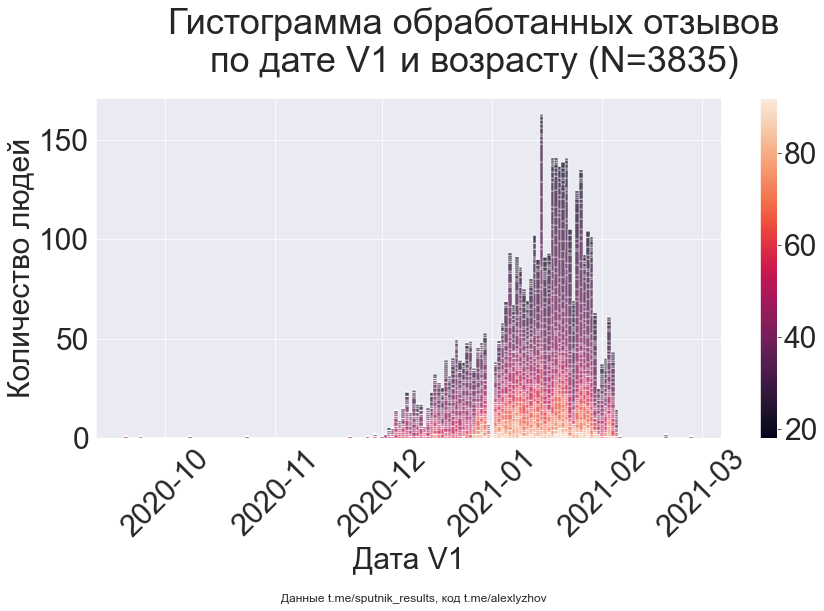

In [56]:
cmap = 'rocket'

plt.figure(figsize=(14, 7))
ax = sns.histplot(data_age_int, x='v1_date', hue='age', multiple='stack', palette=sns.color_palette(cmap, n_colors=74))

xticks = plt.xticks(rotation=45)

ax.get_legend().remove()

norm = plt.Normalize(data_age_int.age.min(), data_age_int.age.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

ax.figure.colorbar(sm)  # discretization may be very slightly different from what histplot shows but I guess that's alright

ax.figure.subplots_adjust(top=0.80)
plt.ylabel('Количество людей') # rotation
plt.xlabel('Дата V1')
plt.suptitle(f'Гистограмма обработанных отзывов\nпо дате V1 и возрасту (N={data[(data["age"].notna() & data["v1_date"].notna())].shape[0]})')
plt.figtext(0.44, -0.2, 'Данные t.me/sputnik_results, код t.me/alexlyzhov', horizontalalignment='center', fontsize=12)

### Time difference between shots

In [57]:
dates_present = data[data['v1_date'].notna() & data['v2_date'].notna()]

In [58]:
dates_present.shape

(1742, 27)

In [59]:
# d = sns.displot((dates_present['v2_date'] - dates_present['v1_date']).dt.days, height=9)

In [60]:
# dates_present[(dates_present['v2_date'] - dates_present['v1_date']).dt.days < 10]  # errors in the table

## Temp values

In [61]:
data.head()

,prev_covid,name,gender,age,illnesses,blood_type,v1_date,v1_fever,v1_chills,v1_headache,...,v2_date,v2_fever,v2_chills,v2_headache,v2_arm_pain,v2_lymph_nodes,v2_muscle_pain,v2_drowsiness_weakness,v2_other,пол
0,None,ekaterina dzyuban,f,None,None,None,None,37.5,None,None,...,None,None,None,None,None,None,None,None,None,ж
1,None,василий,m,37.0,None,None,2020-12-08 00:00:00,38.6,+,None,...,2020-12-28 00:00:00,None,None,None,None,None,None,None,None,м
2,None,алёна,f,50.0,None,None,2020-12-03 00:00:00,False,None,None,...,2020-12-24 00:00:00,None,None,+,None,None,None,+,None,ж
3,None,муж алены дмитрий,m,43.0,None,None,2020-12-05 00:00:00,False,None,None,...,None,None,None,None,None,None,None,None,None,м
4,None,anton,m,37.0,None,None,2020-12-03 00:00:00,38.0,None,None,...,2020-12-24 00:00:00,False,None,None,+,None,None,None,запахи,м


In [62]:
# only take those rows where there are float values for the temperature

In [63]:
with_v1_fever_vals = data[(data['v1_fever'] != True) & data['v1_fever'].notna() & (data['v1_fever'] >= 37)]
with_v1_fever_vals = with_v1_fever_vals.assign(age=lambda d: d['age'].astype(float))
with_v1_fever_vals = with_v1_fever_vals.assign(v1_fever=lambda d: d['v1_fever'].astype(float))

In [64]:
with_v2_fever_vals = data[(data['v2_fever'] != True) & data['v2_fever'].notna() & (data['v2_fever'] >= 37)]
with_v2_fever_vals = with_v2_fever_vals.assign(age=lambda d: d['age'].astype(float))
with_v2_fever_vals = with_v2_fever_vals.assign(v2_fever=lambda d: d['v2_fever'].astype(float))

In [65]:
with_v1_v2_fever_vals = data[(data['v1_fever'] != True) & data['v1_fever'].notna() & (data['v1_fever'] >= 37) &
                             (data['v2_fever'] != True) & data['v2_fever'].notna() & (data['v2_fever'] >= 37)]
with_v1_v2_fever_vals = with_v1_v2_fever_vals.assign(age=lambda d: d['age'].astype(float))
with_v1_v2_fever_vals = with_v1_v2_fever_vals.assign(v2_fever=lambda d: d['v2_fever'].astype(float))

with_v1_v2_fever_vals['fever_val_diff'] = (with_v1_v2_fever_vals.v2_fever - with_v1_v2_fever_vals.v1_fever).astype(float)
with_v1_v2_fever_vals['v1_fever'] = with_v1_v2_fever_vals['v1_fever'].astype(float)
with_v1_v2_fever_vals['v2_fever'] = with_v1_v2_fever_vals['v2_fever'].astype(float)
with_v1_v2_fever_vals['age'] = with_v1_v2_fever_vals['age'].astype(float)

In [66]:
with_v1_fever_vals.shape

(1990, 27)

In [67]:
with_v2_fever_vals.shape

(810, 27)

In [68]:
with_v1_v2_fever_vals.shape

(514, 28)

In [69]:
# # plot of v1 fever value by date
# plt.figure(figsize=(8, 5))
# p = sns.scatterplot(with_v1_fever_vals['v1_date'], with_v1_fever_vals['v1_fever'], sizes=(12, 12))
# p.set(xlim=(datetime(2020, 12, 1), datetime(2021, 2, 8)))

In [70]:
with_v1_fever_vals[(with_v1_fever_vals['v1_date'] >= datetime(2020, 12, 1)) &
                   (with_v1_fever_vals['v1_date'] <= datetime(2020, 12, 31)) &
                   (with_v1_fever_vals['v1_date'].notna())].v1_fever.mean()

37.742406876790874

In [71]:
with_v1_fever_vals[(with_v1_fever_vals['v1_date'] >= datetime(2021, 1, 1)) &
                   (with_v1_fever_vals['v1_date'] <= datetime(2021, 1, 31)) &
                   (with_v1_fever_vals['v1_date'].notna())].v1_fever.mean()

37.88060731538987

Text(0.5, 0, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias')

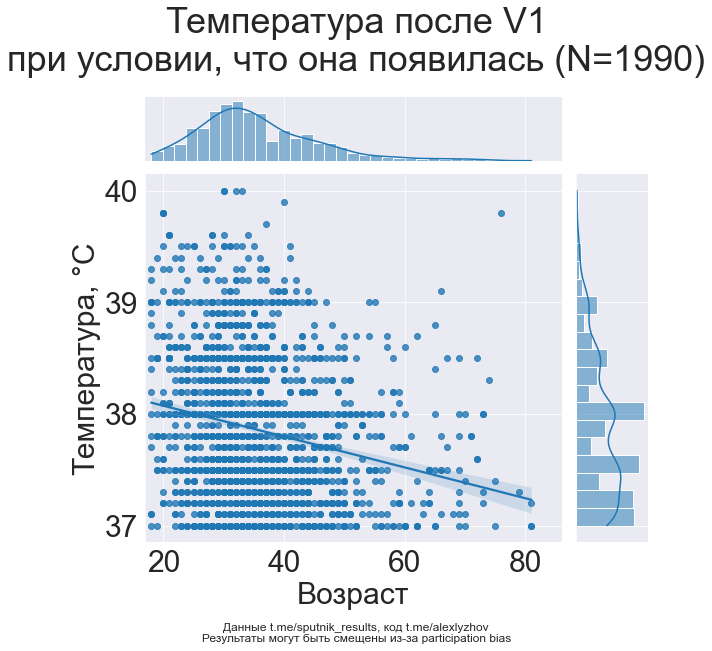

In [72]:
vis = sns.jointplot(x='age', y='v1_fever', data=with_v1_fever_vals, height=9, kind='reg', order=1, xlim=(17, 86))
vis.set_axis_labels('Возраст', 'Температура, °C')
vis.fig.subplots_adjust(top=0.84)
vis.fig.suptitle(f'Температура после V1\nпри условии, что она появилась (N={with_v1_fever_vals.shape[0]})')
# only looking at temp of 37 and above here

# plt.annotate('t.me/sputnik_results\n', (0,0), (-88, -88), fontsize=24, xycoords='axes fraction', textcoords='offset points', va='top')
# plt.xlabel('Возраст\n\nt.me/sputnik_results')
plt.figtext(0.5, 0, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias', horizontalalignment='center', fontsize=12)

Text(0.5, -0.05, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias')

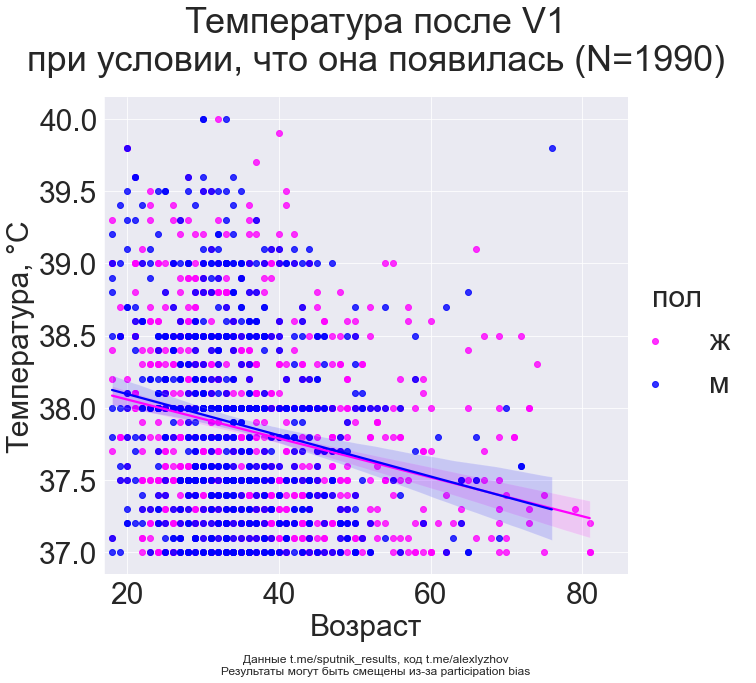

In [73]:
vis = sns.lmplot(x='age', y='v1_fever', data=with_v1_fever_vals, height=9, order=1, hue='пол', palette={'м': 'blue', 'ж': 'magenta'})
# vis = sns.lmplot(x='age', y='v1_fever', data=with_v1_fever_vals, height=9, order=1, hue='gender', palette={'m': 'blue', 'f': 'magenta'})

vis.set_axis_labels('Возраст', 'Температура, °C')
vis.fig.subplots_adjust(top=0.84)
vis.fig.suptitle(f'Температура после V1\nпри условии, что она появилась (N={with_v1_fever_vals.shape[0]})')
# only looking at temp of 37 and above here
vis.set(xlim=(17, 86))
plt.figtext(0.5, -0.05, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias', horizontalalignment='center', fontsize=12)

In [74]:
# vis = sns.jointplot(x='age', y='v1_fever', data=with_v1_fever_vals, height=9)
# vis.set_axis_labels('Возраст', 'Температура')
# vis.fig.subplots_adjust(top=0.9)
# vis.fig.suptitle('Температура при условии, что она появилась')

In [75]:
# data_v1_fever_none_to_normal = data.copy()

In [76]:
# data_v1_fever_none_to_normal.loc[data_v1_fever_none_to_normal['v1_fever'] ]

In [77]:
# sns.displot(x='age', y='v1_fever', data=with_v1_fever_vals, height=9, kind='kde', multiple='fill')

In [78]:
# sns.displot(x='age', y='v1_fever', data=with_v1_fever_vals, height=9)

In [79]:
# sns.displot(x='age', y='v1_fever', data=with_v1_fever_vals, height=9, multiple="stack")

Text(0.5, 0, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias')

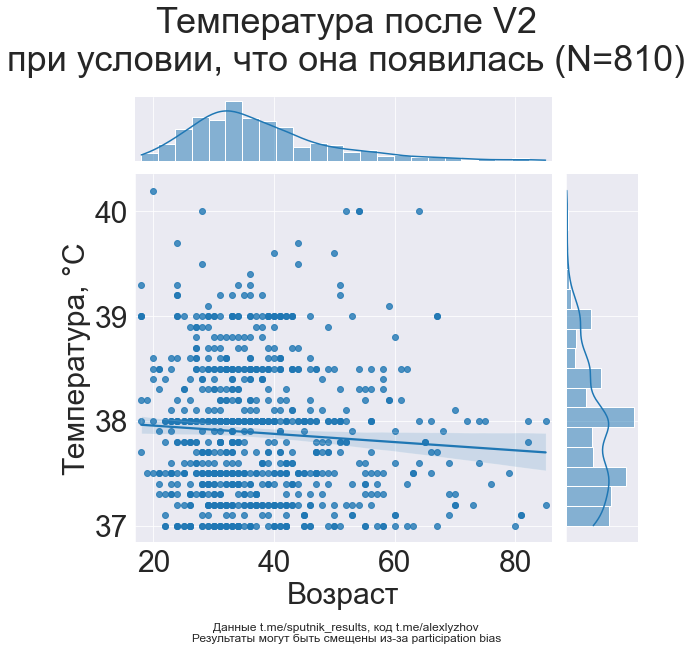

In [80]:
vis = sns.jointplot(x='age', y='v2_fever', data=with_v2_fever_vals, height=9, kind='reg', xlim=(17, 86), order=1)
# vis.set_axis_labels('Возраст\n\nt.me/sputnik_results\nРезультаты могут быть смещены\nиз-за participation bias', 'Температура, °C')
vis.set_axis_labels('Возраст', 'Температура, °C')
vis.fig.subplots_adjust(top=0.84)
vis.fig.suptitle(f'Температура после V2\nпри условии, что она появилась (N={with_v2_fever_vals.shape[0]})')
# vis.xlim(0, 3)
# only looking at temp of 37 and above here
plt.figtext(0.5, 0, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias', horizontalalignment='center', fontsize=12)

Text(0.5, -0.05, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias')

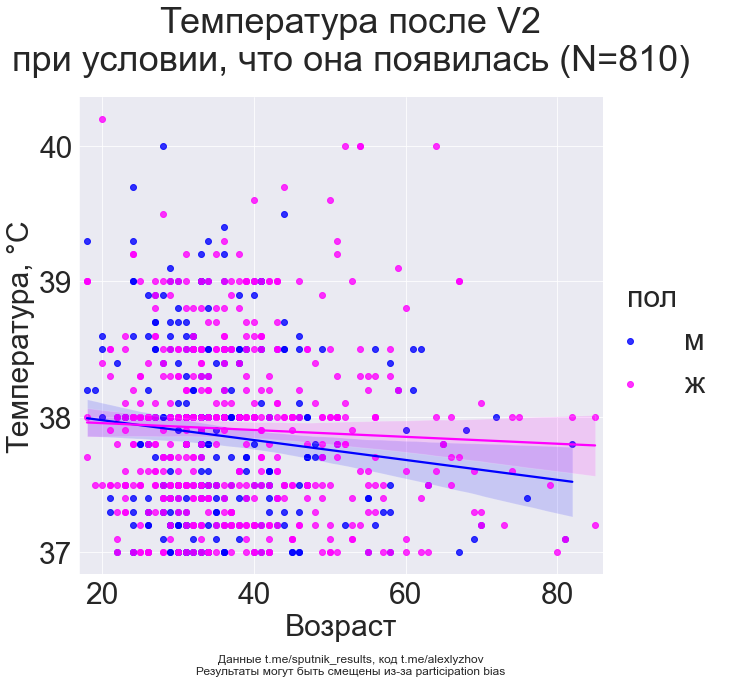

In [81]:
# vis = sns.lmplot(x='age', y='v2_fever', data=with_v2_fever_vals, height=9, order=1, hue='gender', palette={'m': 'blue', 'f': 'magenta'})
vis = sns.lmplot(x='age', y='v2_fever', data=with_v2_fever_vals, height=9, order=1, hue='пол', palette={'м': 'blue', 'ж': 'magenta'})
# vis.set_axis_labels('Возраст\n\nt.me/sputnik_results\nРезультаты могут быть смещены\nиз-за participation bias', 'Температура, °C')
vis.set_axis_labels('Возраст', 'Температура, °C')
vis.fig.subplots_adjust(top=0.84)
vis.fig.suptitle(f'Температура после V2\nпри условии, что она появилась (N={with_v2_fever_vals.shape[0]})')
# vis.xlim(0, 3)
# only looking at temp of 37 and above here
vis.set(xlim=(17, 86))
plt.figtext(0.5, -0.05, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias', horizontalalignment='center', fontsize=12)

Text(0.5, -0.15, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias')

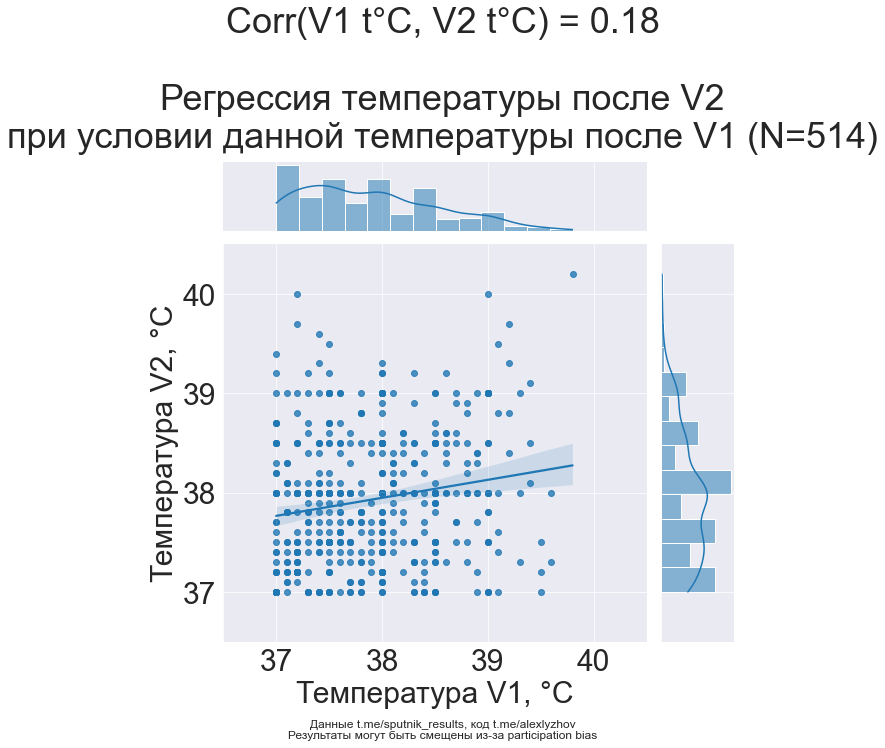

In [82]:
vis = sns.jointplot(x='v1_fever', y='v2_fever', data=with_v1_v2_fever_vals, height=9, kind='reg', order=1, xlim=(36.5, 40.5), ylim=(36.5, 40.5)) #  , xlim=(17, 86)
vis.set_axis_labels('Температура V1, °C', 'Температура V2, °C')
vis.fig.subplots_adjust(top=0.74, bottom=0)
plt.suptitle(f'Corr(V1 t°C, V2 t°C) = {with_v1_v2_fever_vals.corr().loc["v1_fever"]["v2_fever"]:.2f}\n\nРегрессия температуры после V2\nпри условии данной температуры после V1 (N=514)')
plt.figtext(0.5, -0.15, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias', horizontalalignment='center', fontsize=12)

Text(0.5, -0.15, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias')

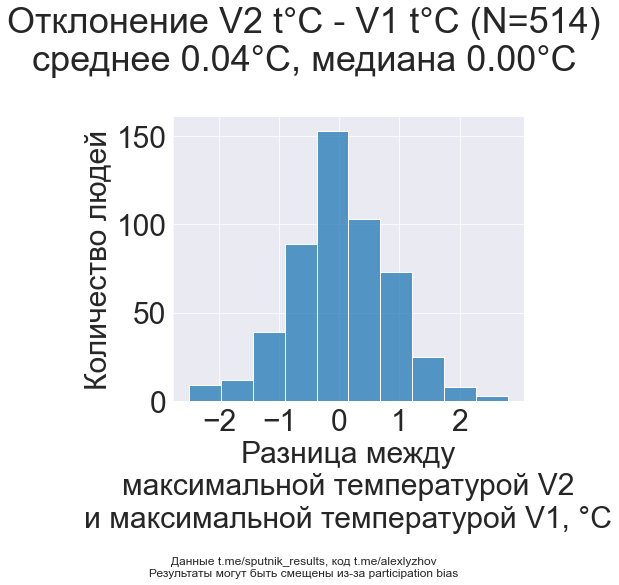

In [83]:
p = sns.displot(x='fever_val_diff', data=with_v1_v2_fever_vals, bins=10, height=7)
plt.ylabel('Количество людей') # rotation
plt.xlabel('Разница между\nмаксимальной температурой V2\nи максимальной температурой V1, °C')
plt.suptitle(f'Отклонение V2 t°C - V1 t°C (N={with_v1_v2_fever_vals.shape[0]})\nсреднее {with_v1_v2_fever_vals.fever_val_diff.mean():.2f}°C, медиана {with_v1_v2_fever_vals.fever_val_diff.median():.2f}°C')
plt.subplots_adjust(top=0.76)
p.set(xticks=[-2, -1, 0, 1, 2])
plt.figtext(0.5, -0.15, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias', horizontalalignment='center', fontsize=12)

In [84]:
## just shows positive correlation, I'll express it with a number instead
# sns.jointplot(x='v1_fever', y='v2_fever', data=with_v1_v2_fever_vals, height=9, kind='reg')

In [85]:
## Look at v2-v1 temp depending on age and gender as well - wasn't that interesting to look at, no dependency, so left that out

# vis = sns.jointplot(x='age', y='fever_val_diff', data=with_v1_v2_fever_vals, height=9, kind='reg', xlim=(20, 80))
# vis = sns.jointplot(x='age', y='fever_val_diff', data=with_v1_v2_fever_vals[with_v1_v2_fever_vals.gender == 'f'],
#                     height=9, kind='reg', xlim=(20, 80))

# vis.set_axis_labels('Возраст', ', °C')
# vis.fig.subplots_adjust(top=0.84)
# vis.fig.suptitle('ь')

### Binary fever analysis

In [86]:
with_v1_info = data[data['v1_date'].notna() | data['v1_fever'].notna() | data['v1_chills'].notna() |
     data['v1_headache'].notna() | data['v1_arm_pain'].notna() | data['v1_lymph_nodes'].notna() |
     data['v1_muscle_pain'].notna() | data['v1_drowsiness_weakness'].notna() | data['v1_other'].notna()]

with_v2_info = data[data['v2_date'].notna() | data['v2_fever'].notna() | data['v2_chills'].notna() |
     data['v2_headache'].notna() | data['v2_arm_pain'].notna() | data['v2_lymph_nodes'].notna() |
     data['v2_muscle_pain'].notna() | data['v2_drowsiness_weakness'].notna() | data['v2_other'].notna()]

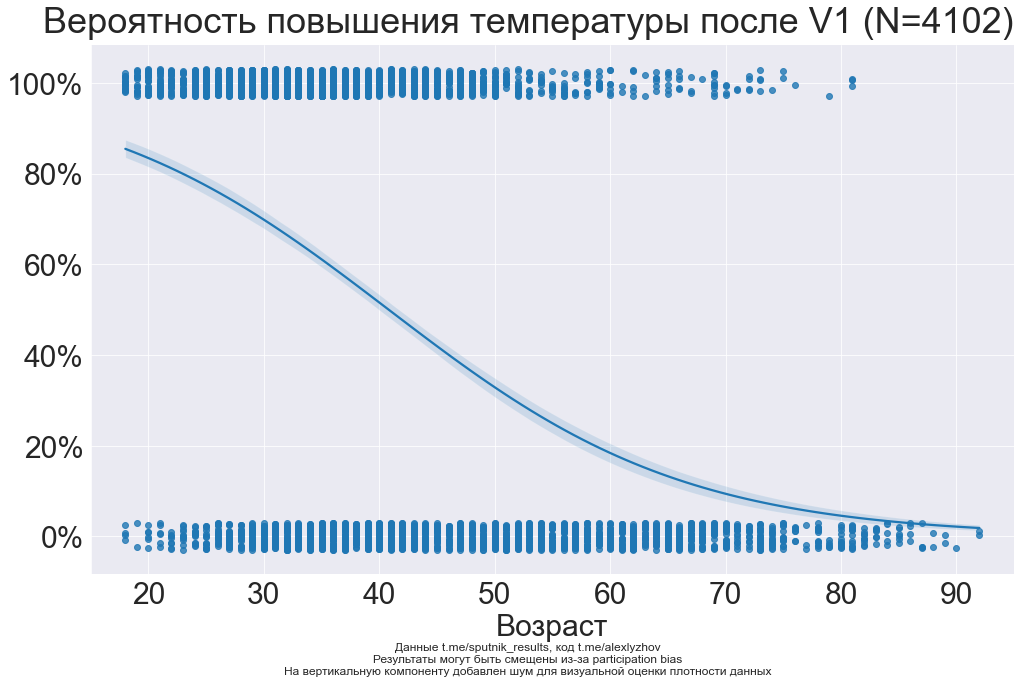

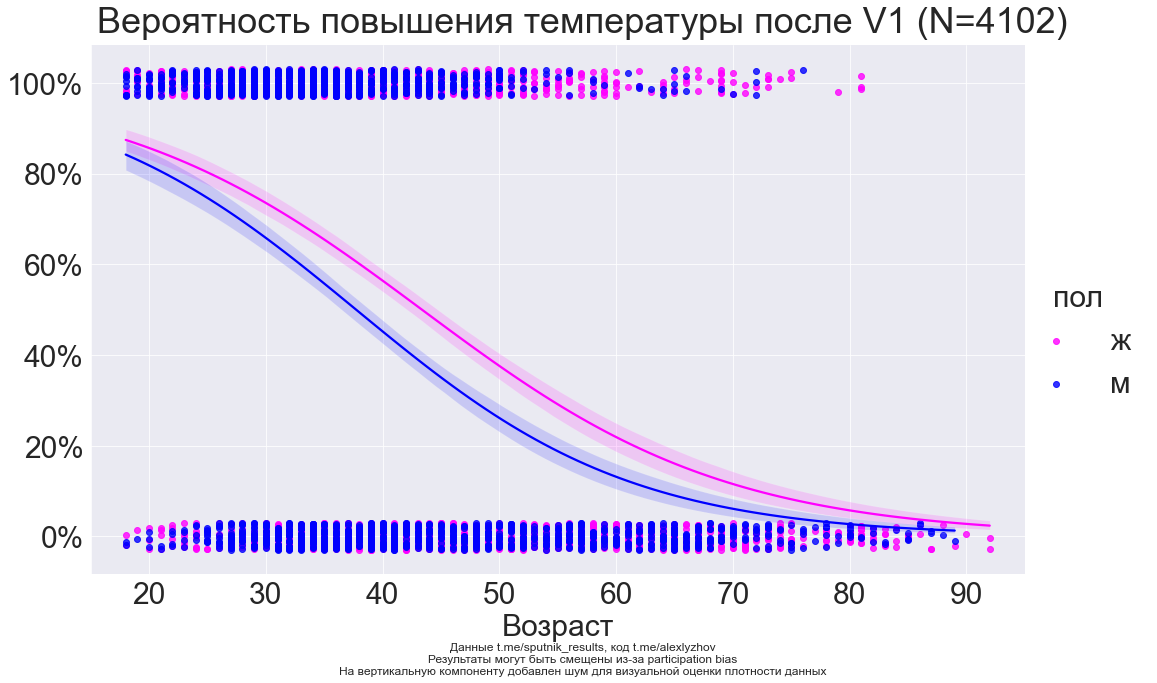

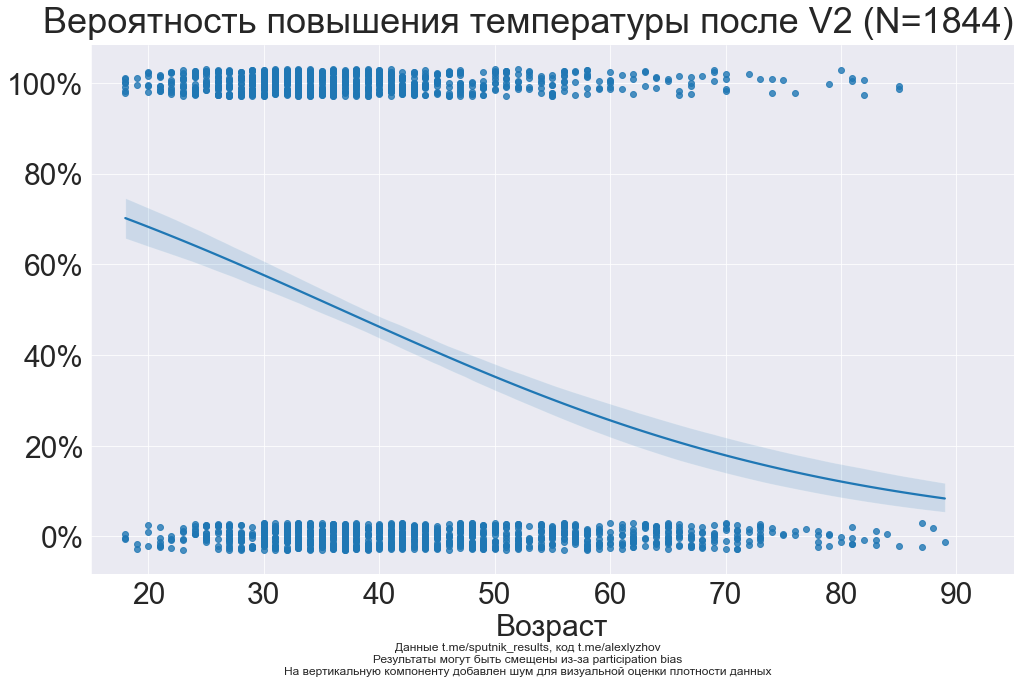

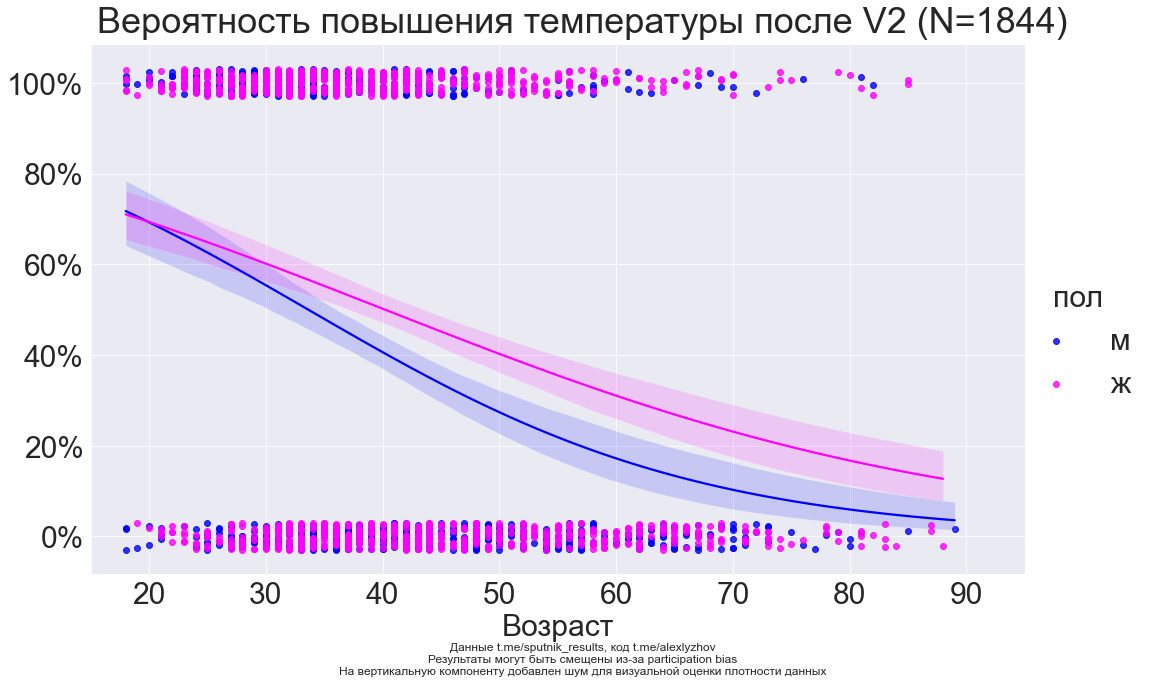

In [89]:
for (fever_field, data_fever_binary, title) in (('v1_fever', with_v1_info.copy(),
                                                 f'Вероятность повышения температуры после V1 (N={with_v1_info.shape[0]})'),
                                                ('v2_fever', with_v2_info.copy(),
                                                 f'Вероятность повышения температуры после V2 (N={with_v2_info.shape[0]})'),):
    data_fever_binary.loc[data_fever_binary[fever_field].isna(), fever_field] = False

    # quickfix to avoid including bool values
    data_fever_binary.loc[(data_fever_binary[fever_field] < 37) & (data_fever_binary[fever_field] > 30), fever_field] = False

    data_fever_binary.loc[(data_fever_binary[fever_field] >= 37), fever_field] = True

    data_fever_binary_float = data_fever_binary.copy()
    data_fever_binary_float[fever_field] = data_fever_binary_float[fever_field].astype('float')
    data_fever_binary_float['age'] = data_fever_binary_float['age'].astype('float')
    
    sns.lmplot(x='age', y=fever_field, data=data_fever_binary_float, y_jitter=0.03, height=9, aspect=1.6, logistic=True)
    plt.xlabel('Возраст')
    plt.ylabel('')  # , fontsize=30
    plt.xlim(15, 95)
    plt.suptitle(title)
    plt.gca().yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
    plt.subplots_adjust(top=0.92)
    plt.figtext(0.5, -0.05, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias\nНа вертикальную компоненту добавлен шум для визуальной оценки плотности данных', horizontalalignment='center', fontsize=12)
    
#     sns.lmplot(x='age', y=fever_field, data=data_fever_binary_float, y_jitter=0.03, height=9, aspect=1.6, logistic=True, hue='gender', palette={'m': 'blue', 'f': 'magenta'})
    sns.lmplot(x='age', y=fever_field, data=data_fever_binary_float, y_jitter=0.03, height=9, aspect=1.6, logistic=True, hue='пол', palette={'м': 'blue', 'ж': 'magenta'})
    plt.xlabel('Возраст')
    plt.ylabel('')  # , fontsize=30
    plt.xlim(15, 95)
    plt.suptitle(title)
    plt.gca().yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
    plt.subplots_adjust(top=0.92)
    plt.figtext(0.5, -0.05, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias\nНа вертикальную компоненту добавлен шум для визуальной оценки плотности данных', horizontalalignment='center', fontsize=12)

In [87]:
# # dependency of v2-v1 on v1
# # nothing interesting, reduction to the mean

# cur_df = with_v1_v2_fever_vals.copy()

# cur_df['fever_val_diff'] = cur_df['fever_val_diff'].astype(float)
# cur_df['v1_fever'] = cur_df['v1_fever'].astype(float)

# vis = sns.jointplot(x='v1_fever', y='fever_val_diff', data=cur_df, height=9, kind='reg', order=1)
# vis.set_axis_labels('Возраст', 'Температура, °C')
# vis.fig.subplots_adjust(top=0.84)
# vis.fig.suptitle('Температура после V2\nпри условии, что она появилась')
# # vis.xlim(0, 3)
# # only looking at temp of 37 and above here

### Correlations between side effects

In [90]:
data.columns

Index(['prev_covid', 'name', 'gender', 'age', 'illnesses', 'blood_type',
       'v1_date', 'v1_fever', 'v1_chills', 'v1_headache', 'v1_arm_pain',
       'v1_lymph_nodes', 'v1_muscle_pain', 'v1_drowsiness_weakness',
       'v1_other', 'v1_antibodies', 'v2_antibodies', 'v2_date', 'v2_fever',
       'v2_chills', 'v2_headache', 'v2_arm_pain', 'v2_lymph_nodes',
       'v2_muscle_pain', 'v2_drowsiness_weakness', 'v2_other', 'пол'],
      dtype='object')

In [91]:
data['v1_chills'].unique()

array([None, '+', 'v', 'х', ' v', ' ', 'x', 'Х'], dtype=object)

In [92]:
data = data.assign(v1_chills = (data['v1_chills'].notna()) & (data['v1_chills'] != ' '))

In [93]:
data['v1_headache'].unique()

array([None, '+', 'v', 'х', 'x', ' x'], dtype=object)

In [94]:
data = data.assign(v1_headache=data['v1_headache'].notna())

In [95]:
data['v1_arm_pain'].unique()

array([None, '+', 'х', 'v', 'x'], dtype=object)

In [96]:
data = data.assign(v1_arm_pain=data['v1_arm_pain'].notna())

In [97]:
data['v1_lymph_nodes'].unique()

array(['+', None, 'v', 'х'], dtype=object)

In [98]:
data = data.assign(v1_lymph_nodes=data['v1_lymph_nodes'].notna())

In [99]:
data['v1_muscle_pain'].unique()

array([None, 'ноги болят', 'мышца шеи', '+', 'v', ' ', 'х', 'x', ' x'],
      dtype=object)

In [100]:
data = data.assign(v1_muscle_pain = (data['v1_muscle_pain'].notna()) & (data['v1_muscle_pain'] != ' '))

In [101]:
data['v1_drowsiness_weakness'].unique()

array([None, '+', 'х', 'слабость', 'v', '  v', '=+B86498', 'x', ' x',
       'тошнота', 'ломота всуставах'], dtype=object)

In [102]:
data = data.assign(v1_drowsiness_weakness=data['v1_drowsiness_weakness'].notna())

In [103]:
# data['v1_other'].unique

In [104]:
data = data.assign(v1_other=data['v1_other'].notna())

In [105]:
data['v2_chills'].unique()

array([None, '+', 'v', 'х', ' ', 'нет', 'x', 37.8], dtype=object)

In [106]:
data = data.assign(v2_chills = (data['v2_chills'].notna()) & (data['v2_chills'] != ' ') & (data['v2_chills'] != 'нет'))

In [107]:
data['v2_headache'].unique()

array([None, '+', 'v', 'х'], dtype=object)

In [108]:
data = data.assign(v2_headache=data['v2_headache'].notna())

In [109]:
data['v2_arm_pain'].unique()

array([None, '+', 'v', 'х', 'x'], dtype=object)

In [110]:
data = data.assign(v2_arm_pain=data['v2_arm_pain'].notna())

In [111]:
data['v2_lymph_nodes'].unique()

array([None, '+', 'v', '(боль подмышкой)', 'х', 'x'], dtype=object)

In [112]:
data = data.assign(v2_lymph_nodes=data['v2_lymph_nodes'].notna())

In [113]:
data['v2_muscle_pain'].unique()

array([None, 'v', '+', 'х', 'x'], dtype=object)

In [114]:
data = data.assign(v2_muscle_pain = (data['v2_muscle_pain'].notna()))

In [115]:
data['v2_drowsiness_weakness'].unique()

array([None, '+', 'v', 'х', 'v1', 'x', 'бессонница', 'глаза болят',
       'повышенный аппетит, боли в коленях',
       'светобоязнь, чувствительность всего тела',
       'сыпь, обострение дерматита', 'сердцебиение', '['], dtype=object)

In [116]:
data = data.assign(v2_drowsiness_weakness=data['v2_drowsiness_weakness'].notna())

In [117]:
# data['v2_other'].unique()

In [118]:
data = data.assign(v2_other=data['v2_other'].notna())

In [119]:
data['v1_fever'].unique()

array([37.5, 38.6, False, 38.0, 37.0, 38.3, 38.5, 37.9, 37.7, 37.2, 37.6,
       39.4, 37.4, 37.3, 37.8, 37.1, 38.2, 40.0, 39.0, 38.8, None, 39.5,
       38.4, 38.1, 38.7, True, 35.6, 34.7, 36.1, 36.8, 36.9, 39.1, 39.2,
       38.9, 39.3, 35.7, 39.8, 39.9, 35.5, 39.6, 36.7, 35.9, 36.5, 35.0,
       35.3, 35.1, 39.7, 36.3, 36.0], dtype=object)

In [120]:
data = data.assign(v1_has_fever=(data['v1_fever'].notna()) & (data['v1_fever'] != False))

In [121]:
data['v2_fever'].unique()

array([None, False, 37.4, 37.1, 38.4, 38.3, 37.2, 37.0, 38.0, 38.5, 38.1,
       38.6, 38.2, 37.7, 40.0, 37.8, 37.9, 39.1, 39.2, 37.5, True, 37.3,
       39.0, 37.6, 38.9, 38.8, 38.7, 34.8, 35.6, 39.5, 39.3, 39.7, 40.2,
       39.6, 35.7, 36.8, 39.4], dtype=object)

In [122]:
data = data.assign(v2_has_fever=(data['v2_fever'].notna()) & (data['v2_fever'] != False))

In [123]:
data = data.assign(gender_female=(data['gender']=='f'))

In [124]:
data = data.assign(has_illnesses=data['illnesses'].notna())

In [125]:
corrs = data[data['v1_date'].notna() & data['v2_date'].notna()][['gender_female', 'has_illnesses',
              'v1_has_fever', 'v1_chills', 'v1_headache', 'v1_arm_pain', 'v1_lymph_nodes', 'v1_muscle_pain',
              'v1_drowsiness_weakness', 'v1_other',
              'v2_has_fever', 'v2_chills', 'v2_headache', 'v2_arm_pain', 'v2_lymph_nodes', 'v2_muscle_pain',
              'v2_drowsiness_weakness', 'v2_other']].corr()

Text(0.5, -0.2, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias')

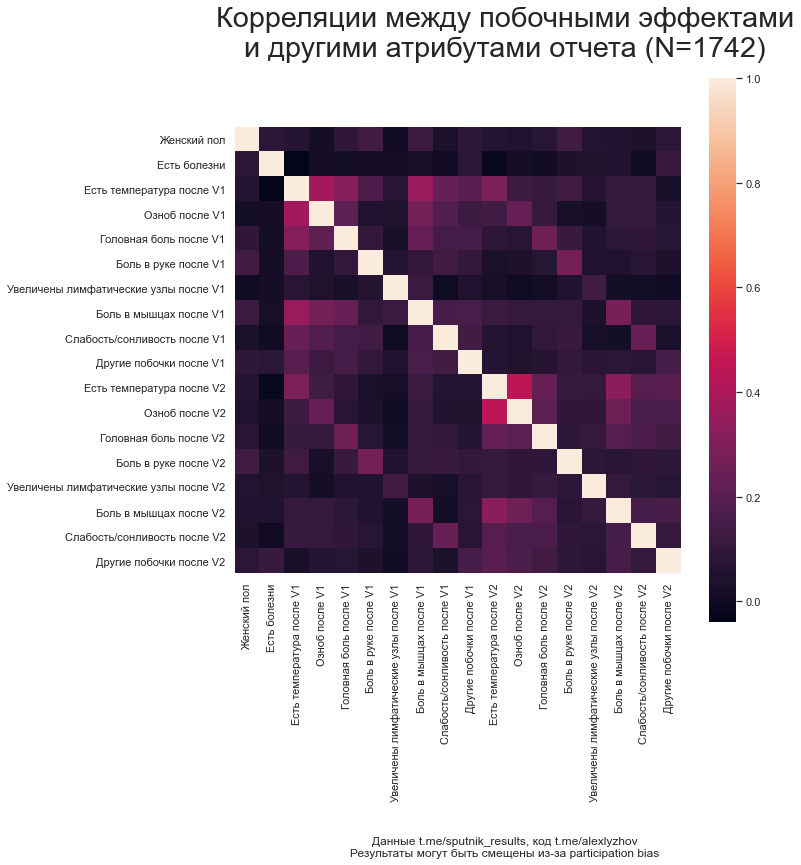

In [126]:
labels = ['Женский пол', 'Есть болезни',
      'Есть температура после V1', 'Озноб после V1', 'Головная боль после V1', 'Боль в руке после V1', 'Увеличены лимфатические узлы после V1', 'Боль в мышцах после V1',
      'Слабость/сонливость после V1', 'Другие побочки после V1',

      'Есть температура после V2', 'Озноб после V2', 'Головная боль после V2', 'Боль в руке после V2', 'Увеличены лимфатические узлы после V2', 'Боль в мышцах после V2',
      'Слабость/сонливость после V2', 'Другие побочки после V2',]

plt.figure(figsize=(10, 10))
# sns.set(font_scale=1.)
with sns.plotting_context('notebook', font_scale=1.):
    heatmap = sns.heatmap(corrs, square=True, xticklabels=labels, yticklabels=labels)
# xticks = plt.xticks(rotation=45)

# sns.set(font_scale=5.)
with sns.plotting_context('notebook', font_scale=2.):
    plt.suptitle(f'Корреляции между побочными эффектами\nи другими атрибутами отчета (N={data[data["v1_date"].notna() & data["v2_date"].notna()].shape[0]})')
# plt.subplots_adjust(top=0.92)

# plt.xlabel('\nt.me/sputnik_results\nРезультаты могут быть смещены\nиз-за participation bias', fontsize=28)
plt.figtext(0.5, -0.2, 'Данные t.me/sputnik_results, код t.me/alexlyzhov\nРезультаты могут быть смещены из-за participation bias', horizontalalignment='center', fontsize=12)

In [127]:
# data.v2_antibodies.unique()

In [128]:
# around 50 diasorin reports after v1, 16 after v2